In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from json import loads, dumps
import math
import matplotlib



In [7]:
def parse_feature_importance(dataframe):

    result = dataframe['feature_importance'].fillna('{}')

    number_of_features = []
    features = []
    for i in result:
        j = i.replace("\'", "\"")
        js = loads(j)
        number_of_features.append(len(js.values()))
        features.append(list(js.keys()))

#     print(number_of_features)
    return number_of_features, features


def parse_join_path_features(dataframe):
    dataframe['join_path_features'] = dataframe['join_path_features'].fillna('')
    result = dataframe['join_path_features']

    number_of_features = []
    jp_features = []
    for i in result:
        j = i.replace("[", "")
        j = j.replace("]", "")
        j = j.replace("'", "")
        k = j.split(", ")
    #     print(k)
    #     print(len(k))

        if len(k) == 1:
            number_of_features.append(0)
        else:
            number_of_features.append(len(k))
        jp_features.append(k)

#     print(number_of_features)
    # print(jp_features)
    return number_of_features, jp_features




def determine_common_features(dataframe):

    nr_common_features = []
    difference = []

    for i, values in enumerate(features):
        set_a = set(values)
        set_b = set(jp_features[i])

#         print(set_a)
#         print(set_b)
    #     print(len(set_a.intersection(set_b)))

        nr_common_features.append(len(set_a.intersection(set_b)))
        difference.append(set_b - set_a)

    # print(nr_common_features)
    # print(difference)
    return nr_common_features, difference

# Revision - Lake

In [32]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark/"
base_filename = "results_base.csv"

df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)

dataset_path = "results/revision/final/lake"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
# mab_filename = "results_mab.csv"

# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
# df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_base])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)

dataframe.reset_index(inplace=True, drop=True)

df = dataframe[~dataframe['data_label'].isin(['air', 'yprop', 'superconduct'])]
df = df[~df['approach'].isin(['Join_All_DFS', 'Join_All_DFS_Filter', 'Join_All_DFS_Wrapper', 'Join_All_BFS_Wrapper'])]
df = df[~df['algorithm'].isin(['LinearModel_2'])]
df.loc[df['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
df.loc[df['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAll-Filter'
df['feature_selection_time'] = df['feature_selection_time'].fillna(0)




['LinearModel', 'KNeighbors', 'RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost']
['bioresponse', 'credit', 'eyemove', 'jannis', 'miniboone', 'steel', 'covertype', 'school']
['AutoFeat', 'ARDA', 'BASE']


In [39]:
df[df['approach']=='ARDA']

,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,rank,top_k
78,KNeighbors,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,230.444978,229.711123,0.488333,0.733855,{'miniboone/table_1_1.csv.Key_1_1': 0.01566666...,"['jannis/table_1_1.csv.Key_1_1', 'eyemove/tabl...",NaN,NaN,NaN
79,KNeighbors,covertype/table_0_0.csv--covertype/table_0_0.c...,ARDA,covertype,186.440438,186.272692,0.533333,0.167745,{'covertype/table_0_0.csv.Key_0_0': 0.02299999...,['covertype/table_1_2.csv.Horizontal_Distance_...,NaN,NaN,NaN
80,KNeighbors,credit/table_0_0.csv--credit/table_0_0.csv-Key...,ARDA,credit,58.604906,58.316218,0.630000,0.288687,{'jannis/table_1_2.csv.Key_1_2': 0.03000000000...,"['eyemove/table_1_3.csv.leavingPos', 'jannis/t...",NaN,NaN,NaN
81,KNeighbors,eyemove/table_0_0.csv--eyemove/table_0_0.csv-K...,ARDA,eyemove,138.116803,137.590829,0.505000,0.525974,{'covertype/table_1_2.csv.Key_1_2': 0.02033333...,"['jannis/table_1_1.csv.Key_1_1', 'miniboone/ta...",NaN,NaN,NaN
82,KNeighbors,jannis/table_0_0.csv--jannis/table_0_0.csv-V44...,ARDA,jannis,178.007160,177.628088,0.521667,0.379071,{'miniboone/table_1_1.csv.Key_1_1': 0.03699999...,"['jannis/table_1_1.csv.Key_1_1', 'miniboone/ta...",NaN,NaN,NaN
83,KNeighbors,miniboone/table_0_0.csv--miniboone/table_0_0.c...,ARDA,miniboone,336.863683,336.628088,0.483333,0.235595,{'miniboone/table_1_3.csv.ParticleID_17': 0.00...,"['miniboone/table_1_1.csv.ParticleID_30', 'min...",NaN,NaN,NaN
84,KNeighbors,school/base.csv--school/base.csv-DBN-DBN-schoo...,ARDA,school,98.433142,97.800422,0.723944,0.632720,{'school/2010_Gen_Ed_Survey_Data.csv.nr_s': 0....,['school/2010_Gen_Ed_Survey_Data.csv.enrollmen...,NaN,NaN,NaN
85,KNeighbors,steel/table_0_0.csv--steel/table_0_0.csv-Key_0...,ARDA,steel,82.650224,82.231578,0.609254,0.418646,{'miniboone/table_1_1.csv.Key_1_1': 0.01388174...,"['jannis/table_1_1.csv.Key_1_1', 'eyemove/tabl...",NaN,NaN,NaN
86,LinearModel,credit/table_0_0.csv--credit/table_0_0.csv-Key...,ARDA,credit,58.079464,57.527910,0.705000,0.551553,{'jannis/table_1_1.csv.V49': 0.024999999999999...,"['jannis/table_1_3.csv.V48', 'eyemove/table_0_...",NaN,NaN,NaN
87,LinearModel,steel/table_0_0.csv--steel/table_0_0.csv-Key_0...,ARDA,steel,79.738639,78.787114,0.629820,0.951525,{'steel/table_1_3.csv.V20': 0.0236503856041131...,"['steel/table_1_1.csv.Key_1_1', 'bioresponse/t...",NaN,NaN,NaN


In [ ]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', 'feature_selection_time'])[['accuracy']].max().reset_index()
total_time['feature_selection_time'] = total_time['feature_selection_time']

taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y="feature_selection_time", hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[2]], hue_order=['BASE', 'ARDA', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)


ax1.set_title("Feature selection time on best model per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
autofeat_tables = [1, 3, 2, 4, 9, 2, 1, 15]
arda_tables = [23, 12, 2, 3, 4, 15, 16, 3]
total_tables = [40, 12, 5, 6, 12, 15, 17, 15]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center')
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center')



ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Accuracy on best model per dataset")

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
# g._legend.remove()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

# plt.savefig('plots/all/dd_simple_acc_feature_selection_time_classification_train_all.pdf', dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

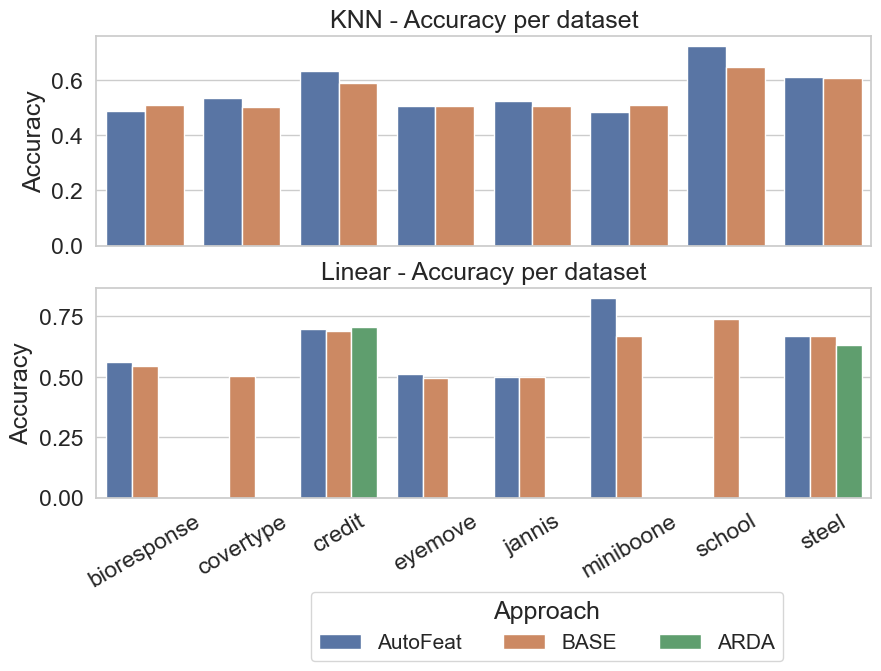

In [35]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


timevar = 'total_time'
df_time = df[df['algorithm']=='KNeighbors']
# df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
#                   palette=[pal[4], pal[0], pal[1], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax1)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()

# loc, labels = plt.xticks()
# hh, ll = plt.gca().get_legend_handles_labels()

# ax2.set_xticklabels(labels, rotation=30)
# plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')


df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
#                   palette=[pal[4], pal[0], pal[1], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')



# plt.savefig('plots/revision/linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")


,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,rank,top_k
86,LinearModel,credit/table_0_0.csv--credit/table_0_0.csv-Key...,ARDA,credit,58.079464,57.527910,0.70500,0.551553,{'jannis/table_1_1.csv.V49': 0.024999999999999...,"['jannis/table_1_3.csv.V48', 'eyemove/table_0_...",NaN,NaN,NaN
87,LinearModel,steel/table_0_0.csv--steel/table_0_0.csv-Key_0...,ARDA,steel,79.738639,78.787114,0.62982,0.951525,{'steel/table_1_3.csv.V20': 0.0236503856041131...,"['steel/table_1_1.csv.Key_1_1', 'bioresponse/t...",NaN,NaN,NaN


# Revision

In [201]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)

# Create a big dataframe
# dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)

df = dataframe[~dataframe['data_label'].isin(['air', 'yprop', 'superconduct'])]
df = df[~df['approach'].isin(['Join_All_DFS', 'Join_All_DFS_Filter', 'Join_All_DFS_Wrapper', 'Join_All_BFS_Wrapper'])]
df = df[~df['algorithm'].isin(['LinearModel_2'])]
df.loc[df['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
df.loc[df['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAll-Filter'
df['feature_selection_time'] = df['feature_selection_time'].fillna(0)


['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['bioresponse', 'covertype', 'credit', 'eyemove', 'jannis', 'miniboone', 'school', 'steel', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE']


In [53]:
dfalg = df[df['algorithm'].isin(['KNeighbors', 'LinearModel'])].groupby(by=['data_label', 'algorithm', 'approach']).max('accuracy').reset_index()
# dfalg = df.groupby(by=['data_label', 'algorithm', 'approach']).max('accuracy').reset_index()
dfalg

# dfalg[(dfalg['data_label']=='bioresponse') & (dfalg['approach'] == 'Join_All_BFS_Filter')]
dfalg[(dfalg['data_label']=='bioresponse')]


,data_label,algorithm,approach,total_time,feature_selection_time,accuracy,train_time,cutoff_threshold,rank,top_k
0,bioresponse,KNeighbors,ARDA,62.233107,56.227861,0.486667,6.005245,NaN,NaN,NaN
1,bioresponse,KNeighbors,AutoFeat,171.773453,86.943583,0.506550,84.829871,0.65,1.320674,15.0
2,bioresponse,KNeighbors,BASE,0.000000,0.000000,0.509461,5.958925,NaN,NaN,NaN
3,bioresponse,KNeighbors,JoinAll,150.977836,0.000000,0.534207,150.977836,NaN,NaN,NaN
4,bioresponse,KNeighbors,JoinAll-Filter,56.924916,0.498210,0.682678,56.426705,NaN,NaN,NaN
5,bioresponse,LinearModel,ARDA,62.233107,56.227861,0.526667,6.005245,NaN,NaN,NaN
6,bioresponse,LinearModel,AutoFeat,171.773453,86.943583,0.749636,84.829871,0.65,1.320674,15.0
7,bioresponse,LinearModel,BASE,0.000000,0.000000,0.542940,5.958925,NaN,NaN,NaN
8,bioresponse,LinearModel,JoinAll,150.977836,0.000000,0.745269,150.977836,NaN,NaN,NaN
9,bioresponse,LinearModel,JoinAll-Filter,56.924916,0.498210,0.751092,56.426705,NaN,NaN,NaN


In [44]:
l = df[df['algorithm'] == 'XGBoost']
gb = l.groupby(['data_label', 'approach'], as_index=False)
subset = {k: v[0] for k, v in gb.groups.items()}
idx = l.index.isin(list(subset.values()))
df_basic = l.iloc[idx, :]
df_basic


,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,rank,top_k
261,XGBoost,"[['school/base.csv', 'DBN', 'DBN', 'school/201...",AutoFeat,school,23.352266,19.006996,0.704225,4.345270,{'school/base.csv.Total Parent Response Rate (...,['school/base.csv.Total Parent Response Rate (...,0.65,1.286036,15.0
285,XGBoost,"[['bioresponse/table_0_0.csv', 'Key_0_0', 'Key...",AutoFeat,bioresponse,64.854202,60.769334,0.630277,4.084868,{'bioresponse/table_1_1.csv.D107': 0.104221251...,"['bioresponse/table_0_0.csv.D235', 'biorespons...",0.65,1.320674,15.0
345,XGBoost,"[['eyemove/table_0_0.csv', 'Key_0_0', 'Key_0_0...",AutoFeat,eyemove,7.623127,1.698213,0.588042,5.924914,{'eyemove/table_2_4.csv.pupilDiamLag': 0.03521...,"['eyemove/table_1_3.csv.P1stFixation', 'eyemov...",0.65,1.238482,15.0
369,XGBoost,"[['covertype/table_0_0.csv', 'Key_0_0', 'Key_0...",AutoFeat,covertype,171.330136,103.975119,0.740465,67.355017,{'covertype/table_1_2.csv.Horizontal_Distance_...,['covertype/table_1_2.csv.Horizontal_Distance_...,0.65,1.378152,15.0
417,XGBoost,"[['miniboone/table_0_0.csv', 'Key_0_0', 'Key_0...",AutoFeat,miniboone,41.270973,26.514837,0.841849,14.756136,{'miniboone/table_1_2.csv.ParticleID_0': 0.234...,"['miniboone/table_0_0.csv.ParticleID_33', 'min...",0.65,1.273525,15.0
477,XGBoost,"[['jannis/table_0_0.csv', 'Key_0_0', 'Key_0_0'...",AutoFeat,jannis,33.219594,17.304326,0.559656,15.915269,{'jannis/table_0_0.csv.V4': 0.0585199999999999...,"['jannis/table_0_0.csv.V42', 'jannis/table_1_1...",0.65,1.244229,15.0
525,XGBoost,"[['steel/table_0_0.csv', 'Key_0_0', 'Key_0_0',...",AutoFeat,steel,6.567202,2.403993,1.000000,4.163208,{'steel/table_3_15.csv.V30': 0.221593830334190...,"['steel/table_2_7.csv.Key_2_7', 'steel/table_1...",0.65,1.463560,15.0
585,XGBoost,"[['credit/table_0_0.csv', 'Key_0_0', 'Key_0_0'...",AutoFeat,credit,4.593438,1.225842,0.630000,3.367597,{'credit/table_1_1.csv.housing': 0.01600000000...,"['credit/table_1_1.csv.job', 'credit/table_0_0...",0.65,1.306851,15.0
606,XGBoost,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,62.233107,56.227861,0.590000,6.005245,{'bioresponse/table_1_1.csv.D107': 0.089999999...,"['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
613,XGBoost,covertype/table_0_0.csv--covertype/table_0_0.c...,ARDA,covertype,71.930568,66.368939,0.541667,5.561629,{'covertype/table_1_1.csv.Hillshade_3pm': 0.01...,"['covertype/table_1_3.csv.Key_1_3', 'covertype...",NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

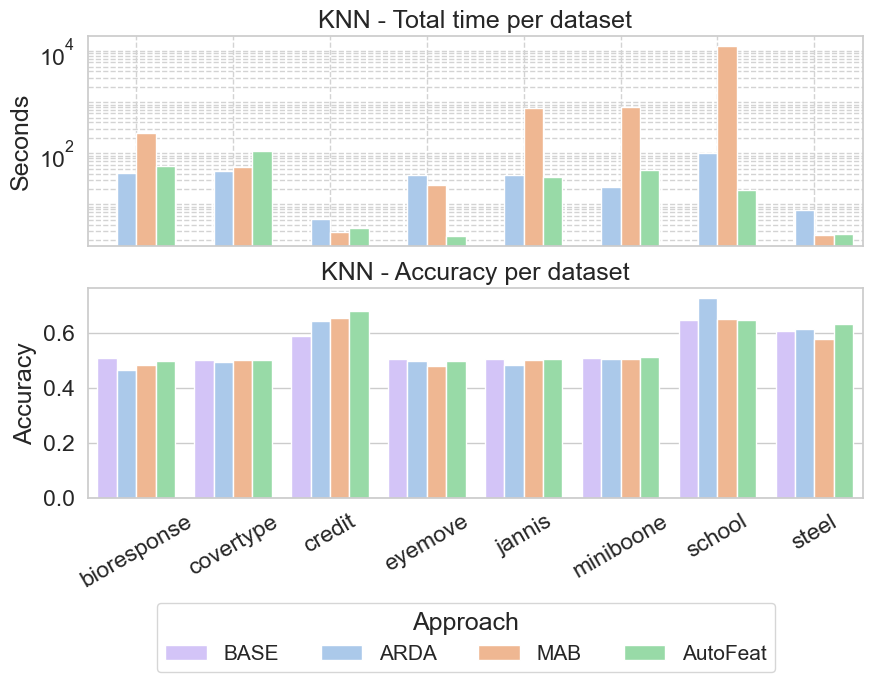

In [164]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

timevar = 'total_time'
# df_time = df[df['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]
# df_time = df
df_time = df[df['algorithm']=='KNeighbors']
# df_time = df[df['algorithm']=='LinearModel']


total_time = df_time.groupby(['data_label', 'approach'])[timevar].mean().reset_index()
taux = total_time[~total_time['approach'].isin(['BASE'])]


accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y=timevar, hue="approach", 
                data=taux, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                  ax=ax1,)
#                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax1)

ax1.set_title("KNN - Total time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')


ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                  ax=ax2,)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("KNN - Accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.45), ncol=6, title="Approach", fontsize='small')


plt.savefig('plots/revision/knn_plots.pdf', dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

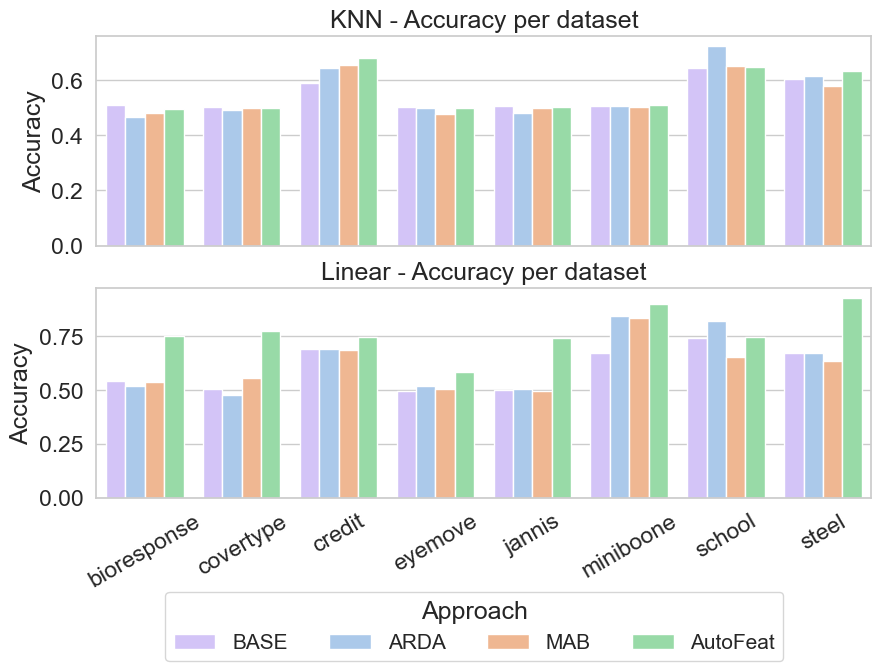

In [203]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


timevar = 'total_time'
df_time = df[df['algorithm']=='KNeighbors']
# df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax1)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()

# loc, labels = plt.xticks()
# hh, ll = plt.gca().get_legend_handles_labels()

# ax2.set_xticklabels(labels, rotation=30)
# plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')


df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')



plt.savefig('plots/revision/linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")


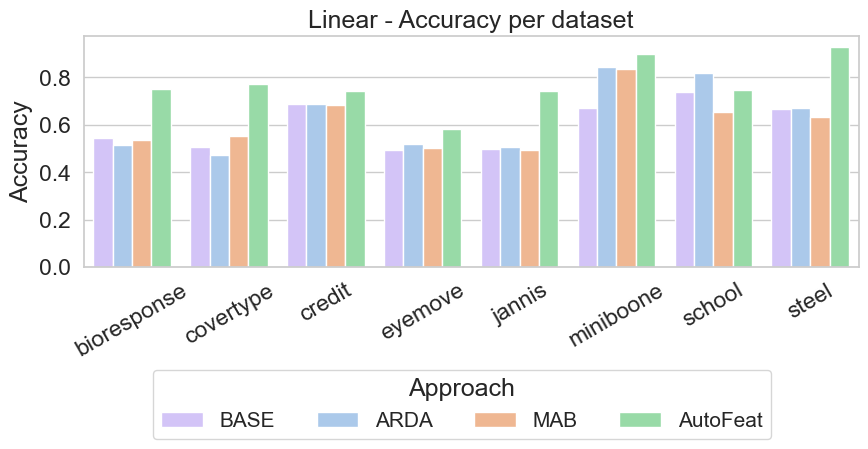

In [175]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure(figsize=(10, 3))

timevar = 'total_time'
df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'])

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')


plt.savefig('plots/revision/linear_accuracy.pdf', dpi=300, bbox_inches="tight")


In [149]:
tree_models = df[df['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]
avg_acc = tree_models.groupby(by=['data_label', 'approach'])['accuracy'].mean().reset_index()

tree_models.groupby(by=['data_label', 'approach'])['feature_selection_time'].mean().reset_index()

# df_max_acc = tree_models.loc[a_idx]
# df_max_acc = df_max_acc[['data_label', 'approach', 'total_time', 'feature_selection_time', 'train_time', 'accuracy']]
# df_max_acc


,data_label,approach,feature_selection_time
0,bioresponse,ARDA,39.764355
1,bioresponse,AutoFeat,49.999650
2,bioresponse,BASE,0.000000
3,bioresponse,MAB,67.472500
4,covertype,ARDA,44.130659
5,covertype,AutoFeat,104.255047
6,covertype,BASE,0.000000
7,covertype,MAB,314.847500
8,credit,ARDA,4.966190
9,credit,AutoFeat,3.232003


# Ablation - Relevance, redundacy

In [204]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark"
filename = "results_tfd_ablation.csv"
autofeat_filename = "results_autofeat_xgb.csv"


# Read data
ablation_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename}"), header=0)
autofeat_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{autofeat_filename}"), header=0)

ablation_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
ablation_df = ablation_df[~ablation_df['data_label'].isin(['air', 'yprop', 'superconduct'])]
ablation_df = ablation_df[~ablation_df['algorithm'].isin(['LinearModel_2'])]

autofeat_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
autofeat_df = autofeat_df[~autofeat_df['data_label'].isin(['air', 'yprop', 'superconduct'])]
autofeat_df = autofeat_df[~autofeat_df['algorithm'].isin(['LinearModel_2'])]
autofeat_df.loc[autofeat_df['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(ablation_df['algorithm'].unique())
print(algs)

tables = list(ablation_df['data_label'].unique())
print(tables)

approach = list(ablation_df['approach'].unique())
print(approach)

['XGBoost']
['credit', 'steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'school', 'covertype']
['AutoFeat-Pearson-MRMR', 'AutoFeat-Pearson-JMI', 'AutoFeat-Spearman-JMI', 'AutoFeat_Red', 'AutoFeat_Rel']


In [208]:
a = ablation_df[ablation_df['algorithm'] == 'XGBoost']

In [200]:
b = a[a['data_label'] == 'covertype']
c = b.loc[b.groupby(by=['data_label', 'approach'])['accuracy'].idxmax()]

# c.loc[2359] # Pearson-MRMR
# c.loc(2396) # MRMR

pr_s = c.loc[2359]['join_path_features']

j = pr_s.replace("[", "")
j = j.replace("]", "")
j = j.replace("'", "")
pr_k = j.split(", ")

print(len(pr_k))

mr_s = c.loc[2396]['join_path_features']

j = mr_s.replace("[", "")
j = j.replace("]", "")
j = j.replace("'", "")
mr_k = j.split(", ")

print(len(mr_k))

bb = autofeat_df[autofeat_df['data_label'] == 'covertype']
cc = bb.loc[bb.groupby(by=['data_label', 'approach'])['accuracy'].idxmax()]

af_s = cc.loc[75]['join_path_features']

j = af_s.replace("[", "")
j = j.replace("]", "")
j = j.replace("'", "")
af_k = j.split(", ")

print(len(af_k))

49
45
51


In [209]:
a_idx = a.groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc = a.loc[a_idx]
max_acc = max_acc[['data_label', 'approach', 'total_time', 'feature_selection_time', 'train_time', 'accuracy']]
max_acc


,data_label,approach,total_time,feature_selection_time,train_time,accuracy
287,bioresponse,AutoFeat-Pearson-JMI,619.595821,599.360086,20.235735,0.786026
272,bioresponse,AutoFeat-Pearson-MRMR,65.483675,49.124879,16.358796,0.781659
297,bioresponse,AutoFeat-Spearman-JMI,612.032287,598.630240,13.402047,0.780204
316,bioresponse,AutoFeat_Red,62.612080,48.327488,14.284592,0.783115
339,bioresponse,AutoFeat_Rel,41.148742,24.423889,16.724853,0.786026
396,covertype,AutoFeat-Pearson-JMI,273.076930,112.137275,160.939655,0.935730
382,covertype,AutoFeat-Pearson-MRMR,243.138985,103.510467,139.628519,0.968172
408,covertype,AutoFeat-Spearman-JMI,273.849008,111.905923,161.943085,0.935730
419,covertype,AutoFeat_Red,223.271627,102.856725,120.414901,0.966732
429,covertype,AutoFeat_Rel,265.229252,102.828303,162.400949,0.967641


In [206]:
af_idx = autofeat_df[(autofeat_df['algorithm'] == 'XGBoost')].groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc_af = autofeat_df.loc[af_idx]
max_acc_af = max_acc_af[['data_label', 'approach', 'total_time','feature_selection_time', 'train_time', 'accuracy']]
max_acc_af

,data_label,approach,total_time,feature_selection_time,train_time,accuracy
53,bioresponse,AutoFeat,62.371289,49.782938,12.588351,0.780204
75,covertype,AutoFeat,247.128094,103.847148,143.280947,0.967641
3,credit,AutoFeat,3.448648,3.096690,0.351958,0.720000
49,eyemove,AutoFeat,2.660248,1.567103,1.093145,0.634034
30,jannis,AutoFeat,21.819707,17.074637,4.745070,0.802970
46,miniboone,AutoFeat,31.468672,24.437951,7.030720,0.936301
70,school,AutoFeat,18.886915,18.498535,0.388380,0.707042
5,steel,AutoFeat,2.921165,2.273217,0.647948,0.943445


In [38]:
ablation_study = max_acc.copy()

# indexs = list(ablation_study[ablation_study['data_label'] == 'bioresponse'].index)
indexs = list(ablation_study.index)
for idx in indexs:
    aux = ablation_study.loc[idx]
    selected_row = max_acc[(max_acc['data_label'] == aux['data_label']) & (max_acc['approach'] == aux['approach'])]
    max_autofeat_row = max_acc_af[max_acc_af['data_label'] == aux['data_label']]
    ablation_study.at[idx, 'accuracy'] = round(selected_row['accuracy'].values[0] - max_autofeat_row['accuracy'].values[0],4)
#     ablation_study.at[idx, 'feature_selection_time'] = ((selected_row['feature_selection_time'].values[0] * 100) / max_autofeat_row['feature_selection_time'].values[0]) / 100
#     ablation_study.at[idx, 'train_time'] = ((selected_row['train_time'].values[0] * 100) / max_autofeat_row['train_time'].values[0]) / 100
    
    



In [39]:
view = ablation_study.groupby(by=['data_label', 'approach'])[['approach', 'accuracy']].max('accuracy').reset_index()
view.pivot(index='data_label', columns='approach', values=['accuracy'])


accuracy                                              \
approach    AutoFeat-Pearson-JMI AutoFeat-Pearson-MRMR AutoFeat-Spearman-JMI   
data_label                                                                     
bioresponse               0.0029                0.0116                0.0015   
covertype                -0.0322               -0.0021               -0.0322   
credit                    0.0000                0.0000                0.0000   
eyemove                   0.0302                0.0447                0.0302   
jannis                    0.0002               -0.0031                0.0002   
miniboone                -0.0042               -0.0034               -0.0042   
school                    0.0085                0.0000                0.0085   
steel                    -0.1645                0.0566               -0.1645   

                                       
approach    AutoFeat_Red AutoFeat_Rel  
data_label                             
bioresponse       0.0000      -0.0015  
covertype        -0.0007      -0.0007  
credit            0.0000       0.0000  
eyemove           0.0565       0.0145  
jannis            0.0003       0.0024  
miniboone        -0.0034      -0.0034  
school            0.0817      -0.0028  
steel                NaN          NaN

<Figure size 640x480 with 0 Axes>

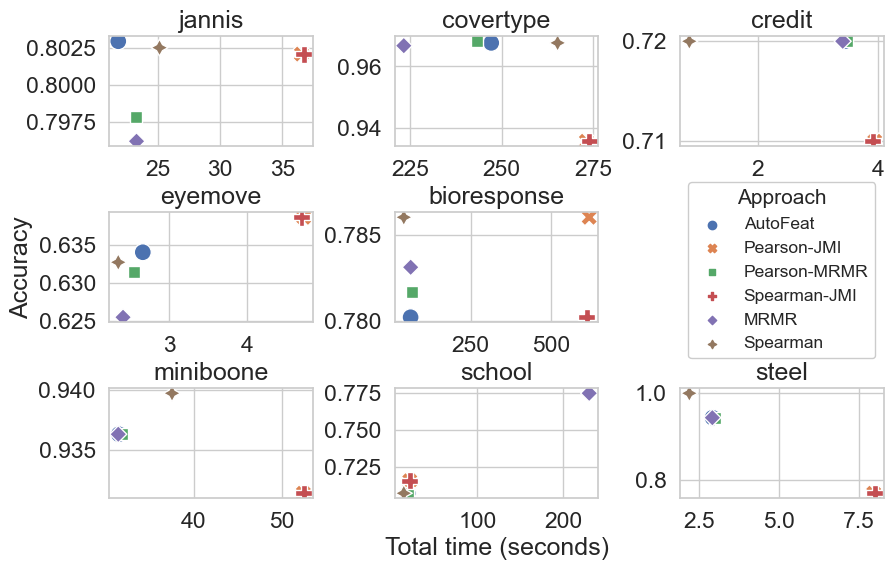

In [228]:
plot_data = pd.concat([max_acc_af, max_acc])
plot_data.loc[plot_data['approach']=='AutoFeat', 'approach'] = 'AutoFeat'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-JMI', 'approach'] = 'Pearson-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-MRMR', 'approach'] = 'Pearson-MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat-Spearman-JMI', 'approach'] = 'Spearman-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat_Red', 'approach'] = 'MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat_Rel', 'approach'] = 'Spearman'

sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, axs = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

a00 = plot_data[plot_data['data_label'] == 'jannis']
sns.scatterplot(data=a00, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][0])
axs[0][0].get_legend().remove()
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('')
axs[0][0].set_title('jannis')

a01 = plot_data[plot_data['data_label'] == 'covertype']
sns.scatterplot(data=a01, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][1])
axs[0][1].get_legend().remove()
axs[0][1].set_xlabel('')
axs[0][1].set_ylabel('')
axs[0][1].set_title('covertype')

a02 = plot_data[plot_data['data_label'] == 'credit']
sns.scatterplot(data=a02, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][2])
axs[0][2].get_legend().remove()
axs[0][2].set_xlabel('')
axs[0][2].set_ylabel('')
axs[0][2].set_title('credit')



a10 = plot_data[plot_data['data_label'] == 'eyemove']
sns.scatterplot(data=a10, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[1][0])
axs[1][0].get_legend().remove()
axs[1][0].set_xlabel('')
axs[1][0].set_ylabel('Accuracy')
axs[1][0].set_title('eyemove')


a12 = plot_data[plot_data['data_label'] == 'bioresponse']
sns.scatterplot(data=a12, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[1][1])
axs[1][1].get_legend().remove()
axs[1][1].set_xlabel('')
axs[1][1].set_ylabel('')
axs[1][1].set_title('bioresponse')


a20 = plot_data[plot_data['data_label'] == 'miniboone']
sns.scatterplot(data=a20, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][0])
axs[2][0].get_legend().remove()
axs[2][0].set_xlabel('')
axs[2][0].set_ylabel('')
axs[2][0].set_title('miniboone')


a21 = plot_data[plot_data['data_label'] == 'school']
sns.scatterplot(data=a21, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][1])
axs[2][1].get_legend().remove()
axs[2][1].set_xlabel('Total time (seconds)')
axs[2][1].set_ylabel('')
axs[2][1].set_title('school')


a22 = plot_data[plot_data['data_label'] == 'steel']
sns.scatterplot(data=a22, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][2])
axs[2][2].set_xlabel('')
axs[2][2].set_ylabel('')
axs[2][2].set_title('steel')

axs[1][2].remove()

hh, ll = axs[0][2].get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(1, 2.95), ncol=1, title="Approach", facecolor='white',
           framealpha=1, fontsize="x-small", title_fontsize='small')

plt.savefig('plots/revision/ablation_rel_red.pdf', dpi=300, bbox_inches="tight")
# 

In [211]:
plot_data.groupby(by=['data_label', 'approach']).max('accuracy')

total_time  feature_selection_time  train_time  \
data_label  approach                                                       
bioresponse AutoFeat       62.371289               49.782938   12.588351   
            MRMR           62.612080               48.327488   14.284592   
            Pearson-JMI   619.595821              599.360086   20.235735   
            Pearson-MRMR   65.483675               49.124879   16.358796   
            Spearman       41.148742               24.423889   16.724853   
            Spearman-JMI  612.032287              598.630240   13.402047   
covertype   AutoFeat      247.128094              103.847148  143.280947   
            MRMR          223.271627              102.856725  120.414901   
            Pearson-JMI   273.076930              112.137275  160.939655   
            Pearson-MRMR  243.138985              103.510467  139.628519   
            Spearman      265.229252              102.828303  162.400949   
            Spearman-JMI  273.849008              111.905923  161.943085   
credit      AutoFeat        3.448648                3.096690    0.351958   
            MRMR            3.411692                3.102325    0.309367   
            Pearson-JMI     3.942749                3.622179    0.320570   
            Pearson-MRMR    3.475849                3.163288    0.312561   
            Spearman        0.866698                0.373729    0.492968   
            Spearman-JMI    3.911104                3.601803    0.309301   
eyemove     AutoFeat        2.660248                1.567103    1.093145   
            MRMR            2.406597                1.561791    0.844806   
            Pearson-JMI     4.725353                3.757549    0.967804   
            Pearson-MRMR    2.544346                1.551566    0.992781   
            Spearman        2.345434                1.256274    1.089160   
            Spearman-JMI    4.699161                3.747396    0.951765   
jannis      AutoFeat       21.819707               17.074637    4.745070   
            MRMR           23.285224               17.003344    6.281880   
            Pearson-JMI    36.529419               29.702366    6.827053   
            Pearson-MRMR   23.233404               17.009697    6.223707   
            Spearman       25.132920               15.143192    9.989728   
            Spearman-JMI   36.710663               29.795732    6.914930   
miniboone   AutoFeat       31.468672               24.437951    7.030720   
            MRMR           31.398713               24.284110    7.114604   
            Pearson-JMI    52.446730               40.223591   12.223139   
            Pearson-MRMR   31.859953               24.829383    7.030570   
            Spearman       37.511433               23.473828   14.037606   
            Spearman-JMI   52.485938               40.366051   12.119886   
school      AutoFeat       18.886915               18.498535    0.388380   
            MRMR          230.489738              200.174445   30.315293   
            Pearson-JMI    21.349487               20.930819    0.418669   
            Pearson-MRMR   18.719657               18.342778    0.376879   
            Spearman       14.400669               14.112167    0.288502   
            Spearman-JMI   21.244637               20.818714    0.425923   
steel       AutoFeat        2.921165                2.273217    0.647948   
            MRMR            2.914705                2.275133    0.639573   
            Pearson-JMI     7.955500                7.088136    0.867364   
            Pearson-MRMR    2.994320                2.296596    0.697724   
            Spearman        2.195806                1.487466    0.708340   
            Spearman-JMI    7.987051                7.098565    0.888487   

                          accuracy  
data_label  approach                
bioresponse AutoFeat      0.780204  
            MRMR          0.783115  
            Pearson-JMI   0.786026  
            Pearson-MRMR  0.781659  
   

In [181]:
plot_data

,data_label,approach,total_time,feature_selection_time,train_time,accuracy
53,bioresponse,AutoFeat,62.371289,49.782938,12.588351,0.780204
75,covertype,AutoFeat,247.128094,103.847148,143.280947,0.967641
3,credit,AutoFeat,3.448648,3.096690,0.351958,0.720000
49,eyemove,AutoFeat,2.660248,1.567103,1.093145,0.634034
30,jannis,AutoFeat,21.819707,17.074637,4.745070,0.802970
46,miniboone,AutoFeat,31.468672,24.437951,7.030720,0.936301
70,school,AutoFeat,18.886915,18.498535,0.388380,0.707042
5,steel,AutoFeat,2.921165,2.273217,0.647948,0.943445
46,bioresponse,Pearson-JMI,7644.936937,7635.012079,9.924858,0.551674
1,bioresponse,Pearson-MRMR,4415.359738,4405.316860,10.042878,0.550218


# Data Lake setting

In [40]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/lake"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)

# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)

df = dataframe[~dataframe['data_label'].isin(['air', 'yprop', 'superconduct'])]
df = df[~df['approach'].isin(['Join_All_DFS', 'Join_All_DFS_Filter', 'Join_All_DFS_Wrapper', 'Join_All_BFS_Wrapper'])]
df = df[~df['algorithm'].isin(['LinearModel_2'])]
df.loc[df['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
df.loc[df['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAll-Filter'
df['feature_selection_time'] = df['feature_selection_time'].fillna(0)


['KNeighbors', 'LinearModel', 'LinearModel_2', 'LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost']
['credit', 'steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'school', 'covertype', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE', 'Join_All_BFS', 'Join_All_BFS_Filter']


<Figure size 640x480 with 0 Axes>

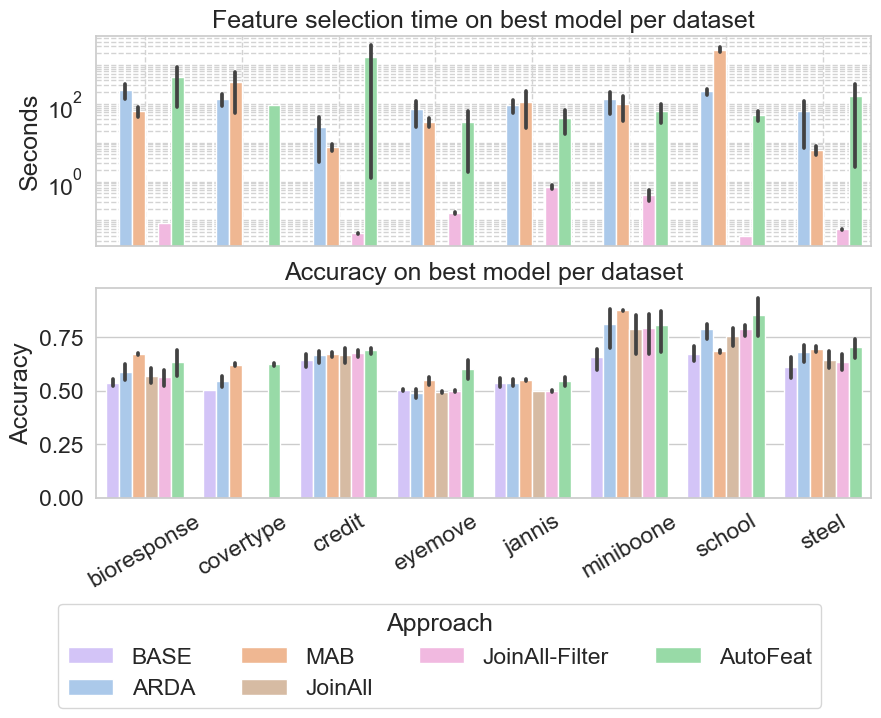

In [45]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

time_var = 'feature_selection_time'
total_time = df.groupby(['data_label', 'approach', 'algorithm', time_var]).mean(time_var).reset_index()
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = df.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y=time_var, hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[2]], hue_order=['BASE', 'ARDA', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax1)


ax1.set_title("Feature selection time on best model per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Accuracy on best model per dataset")

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
# g._legend.remove()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

# plt.savefig('plots/all/dd_simple_acc_feature_selection_time_classification_train_all.pdf', dpi=300, bbox_inches="tight")


# Ablation - top_k, value ratio

In [2]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/ablation"
filename = "k_results.csv"
filename_vr = "value_ratio_results.csv"


# Read data
df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename}"), header=0)
df_vr = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename_vr}"), header=0)

df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
df_vr.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


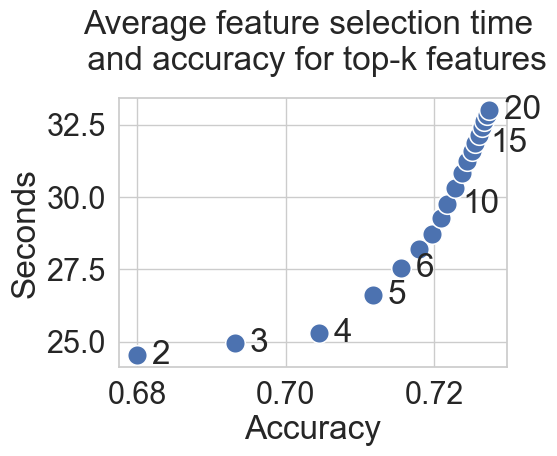

In [5]:
top_k = df[~df['data_label'].isin(['superconduct', 'yprop', 'air'])]
top_k = top_k.groupby(by=['top_k'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=top_k, s=200, ax=ax)

for a in top_k['top_k'].unique():
    b = top_k[top_k['top_k'] == a]
    if int(a) < 7 or int(a) == 10 or int(a) == 15 or int(a) == 20:
        ax.annotate(a, (b['accuracy']+0.002, b['feature_selection_time']-0.3))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Average feature selection time \n and accuracy for top-k features', pad=20)

plt.savefig('plots/all/ablation_top_k-bigger.pdf', dpi=300, bbox_inches="tight")



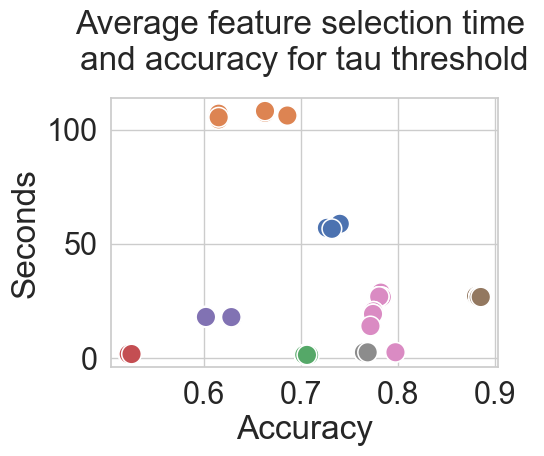

In [6]:
vr = df_vr[~df_vr['data_label'].isin(['superconduct', 'yprop', 'air'])]
vr = vr.groupby(by=['data_label', 'cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")

sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", hue='data_label', data=vr, s=200, ax=ax, c=p)

ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Average feature selection time \nand accuracy for tau threshold', pad=20)

hh, ll = plt.gca().get_legend_handles_labels()
ax.get_legend().remove()

 
plt.savefig('plots/all/dataset_ablation_value_ratio.pdf', dpi=300, bbox_inches="tight")



/Users/andra/Developer/auto-data-augmentation/env/lib/python3.8/site-packages/seaborn/relational.py:658: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(*args, **kws)


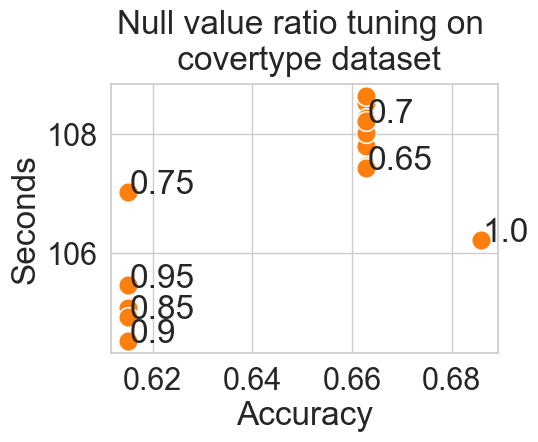

In [7]:
vr = df_vr[df_vr['data_label'].isin(['covertype'])]
vr = vr.groupby(by=['data_label', 'cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")

sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=vr, s=200, ax=ax, c=p[1])

for a in vr['cutoff_threshold'].unique():
    b = vr[vr['cutoff_threshold'] == a]
    if round(a, 2) > 0.6 and not (round(a, 2) == 0.8):
        ax.annotate(round(a, 2), (b['accuracy']+ 0.0003, b['feature_selection_time']-0.03))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Null value ratio tuning on \n covertype dataset', pad=10)

 
plt.savefig('plots/all/covertype_ablation_value_ratio_orange.pdf', dpi=300, bbox_inches="tight")



/Users/andra/Developer/auto-data-augmentation/env/lib/python3.8/site-packages/seaborn/relational.py:658: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(*args, **kws)


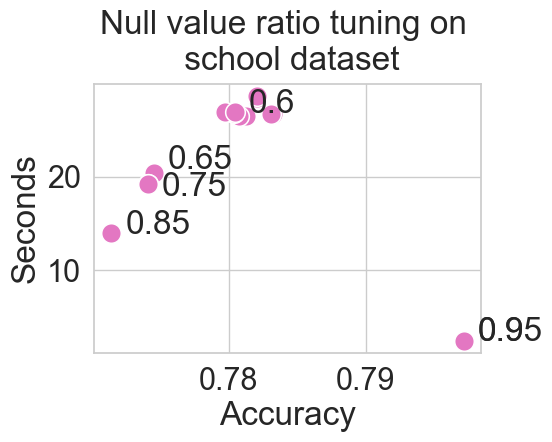

In [8]:
vr = df_vr[df_vr['data_label'].isin(['school'])]
vr = vr.groupby(by=['cutoff_threshold'], group_keys=False).agg({'accuracy': 'mean', 'feature_selection_time': 'mean'}).reset_index()

mini = vr[vr['cutoff_threshold'] < 0.65]


fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)
p = sns.color_palette("tab10")


sns.set(font_scale=2, style="whitegrid")
ax = sns.scatterplot(x="accuracy", y="feature_selection_time", data=vr, s=200, ax=ax, c=p[6])

for a in vr['cutoff_threshold'].unique():
    b = vr[vr['cutoff_threshold'] == a]
    if round(a, 2) > 0.55 and not (round(a, 2) in (0.65, 0.7, 0.75, 0.8)):
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']-0.03))
    if round(a, 2) ==0.75:
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']-1.3))
    if round(a, 2) ==0.65:
        ax.annotate(round(a, 2), (b['accuracy']+ 0.001, b['feature_selection_time']+0.5))
        
ax.set_xlabel('Accuracy')
ax.set_ylabel('Seconds')
ax.set_title('Null value ratio tuning on \n school dataset', pad=10)

plt.savefig('plots/all/school_ablation_value_ratio-pink.pdf', dpi=300, bbox_inches="tight")



# Benchmark setting

In [17]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/benchmark-setting"
tfd_filename = "results_tfd_train_all.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)


# Create a big dataframe
# dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
number_of_features, features = parse_feature_importance(dataframe)
dataframe['number_features_importance'] = number_of_features

number_of_features, jp_features = parse_join_path_features(dataframe)
dataframe['number_join_path_features'] = number_of_features

nr_common_features, difference = determine_common_features(dataframe)
dataframe['nr_common_features'] = nr_common_features
dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'
dataframe.loc[dataframe['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
dataframe.loc[dataframe['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAllF'



# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)


['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost']
['school', 'bioresponse', 'eyemove', 'covertype', 'miniboone', 'jannis', 'steel', 'credit', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE']


# Revision - benchmark

In [125]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark-final"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])
# dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'
dataframe.loc[dataframe['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
dataframe.loc[dataframe['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAllF'



# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)
dataframe['feature_selection_time'] = dataframe['feature_selection_time'].fillna(0)


['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'credit', 'covertype', 'school', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE', 'JoinAll', 'JoinAllF']


In [118]:
approach_mask = dataframe['approach'].isin(['JoinAll', 'JoinAllF'])

# Combine the conditions and use loc to update 'total_time'
dataframe.loc[(dataframe['total_time'] < 1) & approach_mask, 'total_time'] = 1
dataframe.loc[(dataframe['feature_selection_time'] < 1) & approach_mask, 'feature_selection_time'] = 1


In [119]:
dataframe[dataframe['approach'].isin(['JoinAll', 'JoinAllF'])]

,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,rank,top_k
668,LinearModel,credit/table_0_0.csv--credit/table_0_0.csv-Key...,JoinAll,credit,1.000000,1.0,0.750000,0.642735,{'credit/table_2_5.csv.checking_status': 0.046...,"['credit/table_0_0.csv.residence_since', 'cred...",NaN,NaN,NaN
669,LinearModel,credit/table_0_0.csv--credit/table_0_0.csv-Key...,JoinAllF,credit,1.000000,1.0,0.780000,0.354890,{'credit/table_2_5.csv.checking_status': 0.059...,"['credit/table_2_5.csv.checking_status', 'cred...",NaN,NaN,NaN
670,LinearModel,steel/table_0_0.csv--steel/table_0_0.csv-Key_0...,JoinAll,steel,1.000000,1.0,1.000000,0.727695,{'steel/table_3_15.csv.V30': 0.221593830334190...,"['steel/table_0_0.csv.V13', 'steel/table_0_0.c...",NaN,NaN,NaN
671,LinearModel,steel/table_0_0.csv--steel/table_0_0.csv-Key_0...,JoinAllF,steel,1.000000,1.0,1.000000,0.466018,{'steel/table_3_15.csv.V30': 0.221593830334190...,"['steel/table_3_15.csv.V33', 'steel/table_3_15...",NaN,NaN,NaN
672,LinearModel,jannis/table_0_0.csv--jannis/table_0_0.csv-Key...,JoinAll,jannis,7.262547,1.0,0.745485,7.262547,"{'jannis/table_2_11.csv.V12': 0.16204, 'jannis...","['jannis/table_0_0.csv.V4', 'jannis/table_0_0....",NaN,NaN,NaN
673,LinearModel,jannis/table_0_0.csv--jannis/table_0_0.csv-Key...,JoinAllF,jannis,3.511600,1.0,0.745137,3.267868,{'jannis/table_2_11.csv.V12': 0.16616000000000...,"['jannis/table_2_12.csv.V22', 'jannis/table_2_...",NaN,NaN,NaN
674,LinearModel,miniboone/table_0_0.csv--miniboone/table_0_0.c...,JoinAll,miniboone,13.973227,1.0,0.899315,13.973227,{'miniboone/table_3_15.csv.ParticleID_22': 0.0...,"['miniboone/table_0_0.csv.ParticleID_19', 'min...",NaN,NaN,NaN
675,LinearModel,miniboone/table_0_0.csv--miniboone/table_0_0.c...,JoinAllF,miniboone,5.721961,1.0,0.874384,5.369762,{'miniboone/table_1_2.csv.ParticleID_0': 0.082...,"['miniboone/table_1_2.csv.ParticleID_0', 'mini...",NaN,NaN,NaN
676,LinearModel,eyemove/table_0_0.csv--eyemove/table_0_0.csv-K...,JoinAll,eyemove,1.139234,1.0,0.579501,1.139234,{'eyemove/table_2_6.csv.wordNo': 0.02457293035...,"['eyemove/table_0_0.csv.meanFixDur', 'eyemove/...",NaN,NaN,NaN
677,LinearModel,eyemove/table_0_0.csv--eyemove/table_0_0.csv-K...,JoinAllF,eyemove,1.000000,1.0,0.577530,0.620649,{'eyemove/table_2_6.csv.titleNo': 0.0268068331...,"['eyemove/table_2_6.csv.nextWordRegress', 'eye...",NaN,NaN,NaN


UnboundLocalError: local variable 'ha' referenced before assignment

<Figure size 640x480 with 0 Axes>

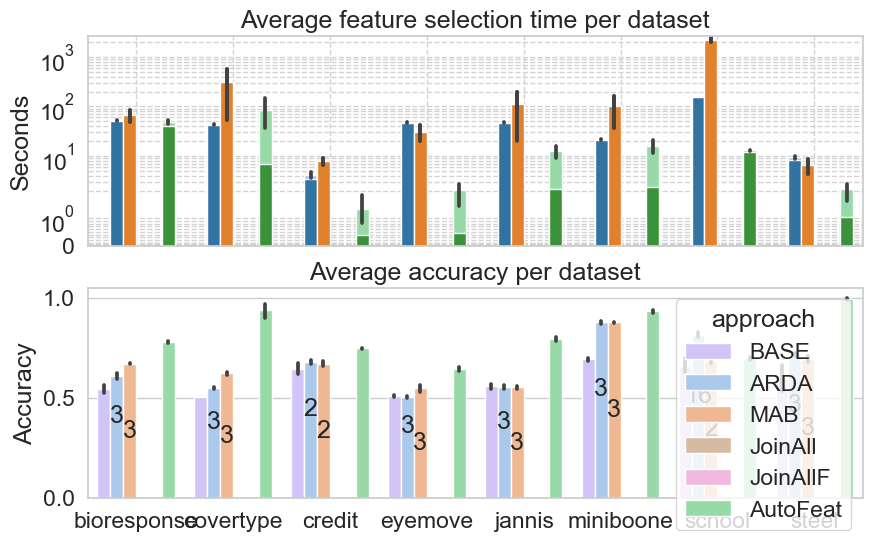

In [129]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")
pal2 = sns.color_palette('tab10')


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')

time_variable = 'feature_selection_time'
df = dataframe[dataframe['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]
# total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', time_variable])[['accuracy']].idxmax()
total_time = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]

accuracy_cls = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]

# accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y='total_time', hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)

ax1 = sns.barplot(x="data_label", y=time_variable, hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal2[4], pal2[0], pal2[1], pal2[5], pal2[6], pal2[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)




ax1.set_title("Average feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('symlog')
# ax1.set_ylim()
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')


ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, 'X', 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge')
# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax2.bar_label(ax2.containers[5], labels=autofeat_tables, label_type='center')



loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.85, -0.45), ncol=3, title="Approach")

# plt.savefig('plots/revision/benchmark-all.pdf', dpi=300, bbox_inches="tight")

In [58]:
total_time = dataframe.loc[dataframe.groupby(by=['data_label', 'approach', 'algorithm', time_variable])['accuracy'].idxmax()]
total_time




,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,rank,top_k
542,ExtraTrees,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,53.262697,51.701897,0.601667,1.560799,"{'bioresponse/table_1_1.csv.D107': 0.085, 'bio...","['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
544,KNeighbors,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,52.001227,51.701897,0.486667,0.299330,"{'bioresponse/table_1_1.csv.D107': 0.0, 'biore...","['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
541,LightGBM,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,52.009773,51.701897,0.623333,0.307876,{'bioresponse/table_1_1.csv.D107': 0.116333333...,"['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
545,LinearModel,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,52.192118,51.701897,0.526667,0.490221,{'bioresponse/table_0_0.csv.D137': 0.027333333...,"['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
540,RandomForest,bioresponse/table_0_0.csv--bioresponse/table_0...,ARDA,bioresponse,53.239729,51.701897,0.620000,1.537832,{'bioresponse/table_1_1.csv.D107': 0.104666666...,"['bioresponse/table_1_2.csv.Key_1_2', 'bioresp...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,XGBoost,table_0_0--Key_0_0-table_1_1.csv--Key_0_0-tabl...,MAB,superconduct,65.230000,65.230000,10.402119,0.000000,"{'range_Density': 18.455465906841802, 'wtd_gme...","['criticaltemp', 'gmean_fie', 'entropy_Thermal...",NaN,NaN,NaN
612,ExtraTrees,table_0_0--Key_0_0-table_1_1.csv--Key_0_0-tabl...,MAB,yprop,52.180000,52.180000,0.028748,0.000000,"{'oz250': 0.008235623192855882, 'Key_1_1': 0.0...","['oz252', 'oz6', 'oz5', 'oz133', 'oz9', 'Key_0...",NaN,NaN,NaN
614,LightGBM,table_0_0--Key_0_0-table_1_1.csv--Key_0_0-tabl...,MAB,yprop,8.250000,8.250000,0.028409,0.000000,"{'oz250': 0.0002294822111779983, 'oz6': 0.0001...","['oz252', 'oz6', 'oz5', 'oz133', 'oz9', 'Key_0...",NaN,NaN,NaN
615,RandomForest,table_0_0--Key_0_0-table_1_1.csv--Key_0_0-tabl...,MAB,yprop,66.770000,66.770000,0.029586,0.000000,"{'oz250': 0.00991008728301241, 'Key_1_2': 0.00...","['oz252', 'oz6', 'oz5', 'oz133', 'oz9', 'Key_0...",NaN,NaN,NaN


In [18]:
l = dataframe[dataframe['algorithm'] == 'LightGBM']
gb = l.groupby(['data_label', 'approach'], as_index=False)
subset = {k: v[0] for k, v in gb.groups.items()}
idx = l.index.isin(list(subset.values()))
df_basic = l.iloc[idx, :]


In [19]:
# Join path length 
df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='credit'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='jannis'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='miniboone'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='covertype'].index, 'join_path_length'] = [2, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='eyemove'].index, 'join_path_length'] = [2, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='bioresponse'].index, 'join_path_length'] = [1, 1, 1, 0]
df_basic.loc[df_basic[df_basic['data_label']=='school'].index, 'join_path_length'] = [1, 1, 1, 0]

# Number of joined tables 
df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'nr_joined_tables'] = [14, 3, 3, 14]
df_basic.loc[df_basic[df_basic['data_label']=='credit'].index, 'nr_joined_tables'] = [2, 2, 2, 4]
df_basic.loc[df_basic[df_basic['data_label']=='jannis'].index, 'nr_joined_tables'] = [1, 3, 3, 11]
df_basic.loc[df_basic[df_basic['data_label']=='miniboone'].index, 'nr_joined_tables'] = [2, 3, 3, 14]
df_basic.loc[df_basic[df_basic['data_label']=='covertype'].index, 'nr_joined_tables'] = [8, 3, 3, 11]
df_basic.loc[df_basic[df_basic['data_label']=='eyemove'].index, 'nr_joined_tables'] = [4, 3, 3, 5]
df_basic.loc[df_basic[df_basic['data_label']=='bioresponse'].index, 'nr_joined_tables'] = [1, 3, 3, 39]
df_basic.loc[df_basic[df_basic['data_label']=='school'].index, 'nr_joined_tables'] = [1, 16, 2, 16]



/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_9617/4222864123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 1, 0]
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_9617/4222864123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic.loc[df_basic[df_basic['data_label']=='steel'].index, 'nr_joined_tables'] = [14, 3, 3, 14]


Text(0.7, 1.1, '15%')

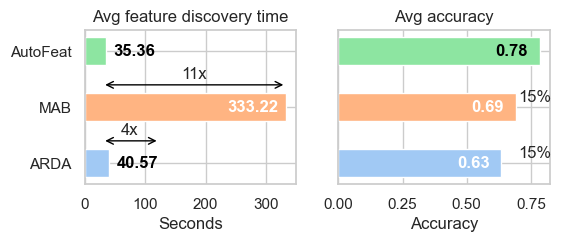

In [3]:
avgd_all = []

# a = dataframe.groupby(['approach', 'algorithm', 'data_label',])[['accuracy']].max().reset_index(level=['algorithm', 'data_label'])
a = dataframe.groupby(['approach', 'algorithm', 
                       'data_label'])[['feature_selection_time', 
                                       'train_time', 'accuracy']].max().reset_index(level=['algorithm', 
                                                                                           'data_label'])



ARDA = a.loc['ARDA']
ARDA = ARDA[~ARDA['data_label'].isin(['superconduct', 'yprop'])]


avgd = {}
avgd['approach'] = 'ARDA'
avgd['avg_acc'] = ARDA['accuracy'].mean()
avgd['avg_feat_sel_time'] = ARDA['feature_selection_time'].mean()
avgd['avg_train_time'] = ARDA['train_time'].mean()

avgd_all.append(avgd)


MAB = a.loc['MAB']
MAB = MAB[~MAB['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'MAB'
avgd['avg_acc'] = MAB['accuracy'].mean()
avgd['avg_feat_sel_time'] = MAB['feature_selection_time'].mean()
avgd['avg_train_time'] = MAB['train_time'].mean()
avgd_all.append(avgd)


TFD_BFS = a.loc['AutoFeat']
TFD_BFS = TFD_BFS[~TFD_BFS['data_label'].isin(['superconduct', 'yprop'])]

avgd = {}
avgd['approach'] = 'AutoFeat'
avgd['avg_acc'] = TFD_BFS['accuracy'].mean()
avgd['avg_feat_sel_time'] = TFD_BFS['feature_selection_time'].mean()
avgd['avg_train_time'] = TFD_BFS['train_time'].mean()
avgd_all.append(avgd)


avgdf = pd.DataFrame(avgd_all)


pal = sns.color_palette("pastel")
sns.set(font_scale=1, style="whitegrid")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

rects1 = ax1.barh(avgdf['approach'], avgdf['avg_feat_sel_time'], align='center', height=0.5, 
                  color=[pal[0], pal[1], pal[2]], 
                  )

rects2 = ax2.barh(avgdf['approach'], avgdf['avg_acc'], align='center', height=0.5,
                 color=[pal[0], pal[1], pal[2]],)

large_percentiles = [round(p, 2) if p > 50 else '' for p in avgdf['avg_feat_sel_time']]
small_percentiles = [round(p, 2) if p <= 50 else '' for p in avgdf['avg_feat_sel_time']]
ax1.bar_label(rects1, small_percentiles,
              padding=5, color='black', fontweight='bold')
ax1.bar_label(rects1, large_percentiles,
              padding=-42, color='white', fontweight='bold')


large_percentiles = [round(p, 2) if p > 0.7 else '' for p in avgdf['avg_acc']]
small_percentiles = [round(p, 2) if p <= 0.7 else '' for p in avgdf['avg_acc']]
ax2.bar_label(rects2, small_percentiles,
              padding=-32, color='white', fontweight='bold')
ax2.bar_label(rects2, large_percentiles,
              padding=-32, color='black', fontweight='bold')


ax1.set_xlabel('Seconds')
ax2.set_xlabel('Accuracy')

ax1.set_title('Avg feature discovery time')
ax2.set_title('Avg accuracy')

ax1.annotate('',xy=(123.54, 0.4),xytext=(29.11, 0.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("4x", xy=(60, 0.5))

ax1.annotate('',xy=(333.22, 1.4),xytext=(29.11, 1.4), arrowprops=dict(arrowstyle="<->", color='black'))
ax1.annotate("11x", xy=(160, 1.5))

ax2.annotate('',xy=(0.84, -0.05),xytext=(0.69, -0.05), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("15%", xy=(0.7, 0.1))

ax2.annotate('',xy=(0.84, 0.95),xytext=(0.69, 0.95), arrowprops=dict(arrowstyle="<->", color='black'))
ax2.annotate("15%", xy=(0.7, 1.1))


# plt.savefig('plots/all/simple_crown-fixed.pdf', dpi=300, bbox_inches="tight")



## Classification

<Figure size 640x480 with 0 Axes>

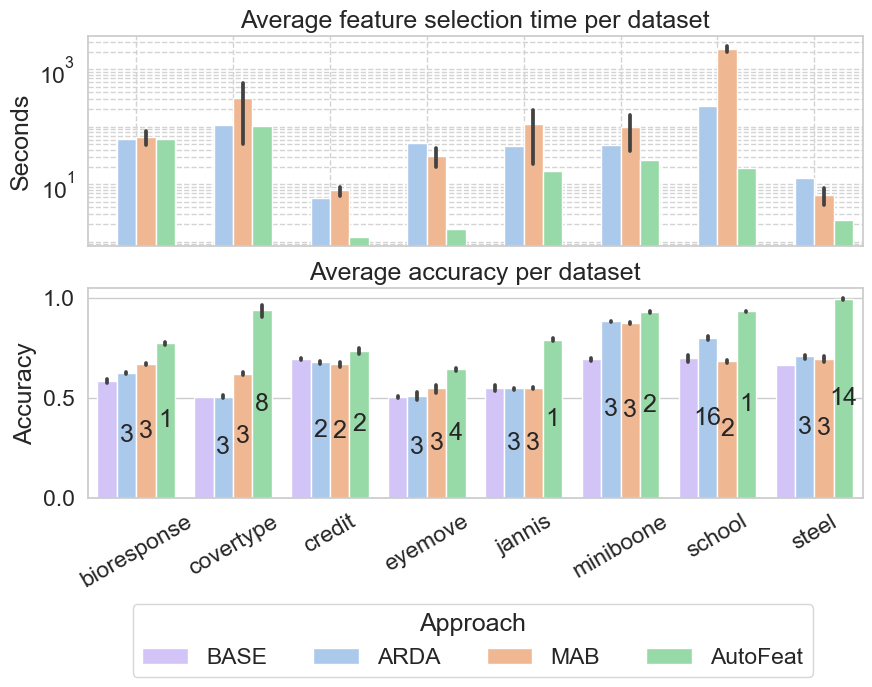

In [29]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', 'feature_selection_time'])[['accuracy']].max().reset_index()
total_time['feature_selection_time'] = total_time['feature_selection_time']

taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y="feature_selection_time", hue="approach", 
                data=taux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
#                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)


ax1.set_title("Average feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')


ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  

# ax2.bar_label(rects1, small_percentiles,
#               padding=5, color='black', fontweight='bold')

# ax2.bar_label(ax2.containers[0], fmt='Mean:\n%.2f', label_type='center')

# ax2.annotate(text=text, xy=xy, ha='center', va='center')


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, 16, 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center')
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center')



loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

# plt.savefig('plots/all/simple_acc_feature_selection_time_classification_train_all-fixed.pdf', dpi=300, bbox_inches="tight")

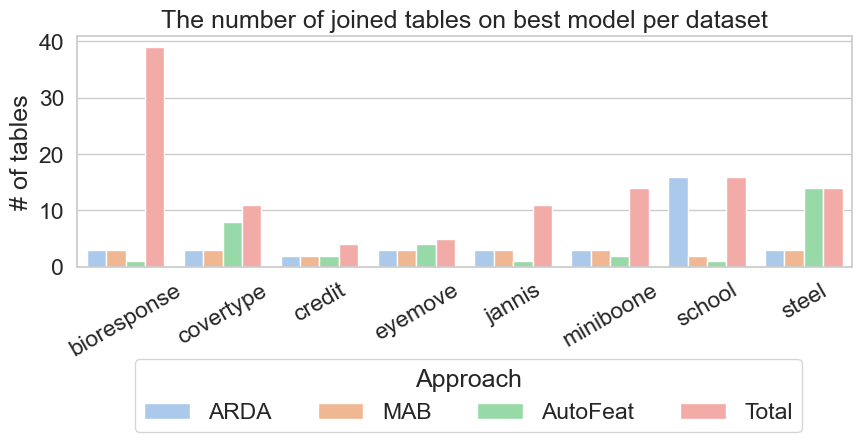

In [18]:
fig = plt.figure(figsize=(10, 3))
sns.set(font_scale=1.5, style="whitegrid")


taux = df_basic[~df_basic['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux.sort_values(by=['data_label'])
taux.loc[taux[taux['approach']=='BASE'].index, 'approach'] = "Total"

ax2 = sns.barplot(x="data_label", y="nr_joined_tables", hue="approach", 
                data=taux, 
                palette=[pal[0], pal[1], pal[2], pal[3]], hue_order=['ARDA', 'MAB', 'AutoFeat', 'Total'])


ax2.set_xlabel('')
ax2.set_ylabel('# of tables')
ax2.set_title("The number of joined tables on best model per dataset")
loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=30)

hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.35), ncol=4, title="Approach")
plt.savefig('plots/all/simple_path_train_all.pdf', dpi=300, bbox_inches="tight")

# Data lake setting

In [21]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/benchmark-setting"
base_filename = "results_base.csv"

df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)

dataset_path = "results/data_lake_setting"
tfd_filename = "results_tfd_train_all.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"

# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_base, df_mab])

# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)

dataframe.reset_index(inplace=True, drop=True)



['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost']
['credit', 'steel', 'jannis', 'miniboone', 'covertype', 'eyemove', 'bioresponse', 'school', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'BASE', 'MAB']


In [22]:
l = dataframe[dataframe['algorithm'] == 'LightGBM']
gb = l.groupby(['data_label', 'approach', 'algorithm'], as_index=False)
subset = {k: v[0] for k, v in gb.groups.items()}
idx = l.index.isin(list(subset.values()))
df_basic_dd = l.iloc[idx, :]


In [23]:
# Join path length 
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='credit'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='jannis'].index, 'join_path_length'] = [2, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='miniboone'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='covertype'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='eyemove'].index, 'join_path_length'] = [2, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='bioresponse'].index, 'join_path_length'] = [1, 1, 0, 1]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='school'].index, 'join_path_length'] = [1, 1, 0, 1]

# Number of joined tables 
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'nr_joined_tables'] = [15, 3, 15, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='credit'].index, 'nr_joined_tables'] = [2, 2, 5, 2]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='jannis'].index, 'nr_joined_tables'] = [9, 4, 12, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='miniboone'].index, 'nr_joined_tables'] = [2, 15, 15, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='covertype'].index, 'nr_joined_tables'] = [3, 12, 12, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='eyemove'].index, 'nr_joined_tables'] = [4, 3, 6, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='bioresponse'].index, 'nr_joined_tables'] = [1, 23, 40, 3]
df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='school'].index, 'nr_joined_tables'] = [1, 16, 17, 2]


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/1732588142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'join_path_length'] = [3, 1, 0, 1]
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_83676/1732588142.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basic_dd.loc[df_basic_dd[df_basic_dd['data_label']=='steel'].index, 'nr_joined_tables'] = [15, 3, 15, 3]


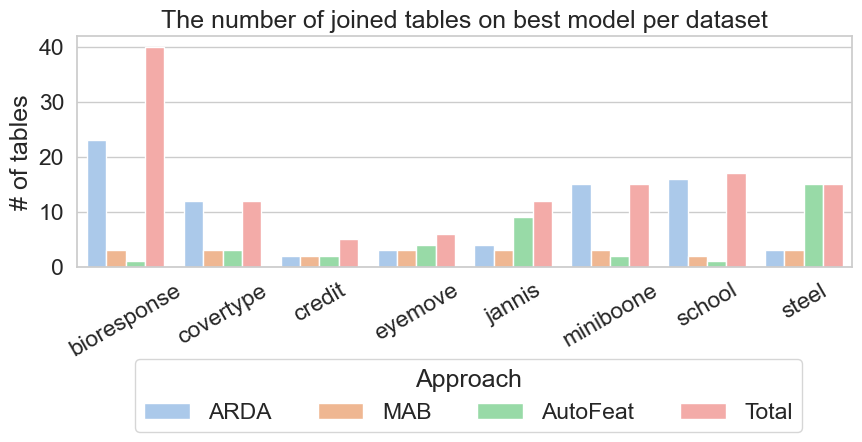

In [24]:
fig = plt.figure(figsize=(10, 3))


taux = df_basic_dd[~df_basic_dd['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux.sort_values(by=['data_label'])
taux.loc[taux[taux['approach']=='BASE'].index, 'approach'] = "Total"


ax2 = sns.barplot(x="data_label", y="nr_joined_tables", hue="approach", 
                data=taux, 
                palette=[pal[0], pal[1], pal[2], pal[3]], hue_order=['ARDA', 'MAB', 'AutoFeat', 'Total'])


ax2.set_xlabel('')
ax2.set_ylabel('# of tables')
ax2.set_title("The number of joined tables on best model per dataset")
loc, labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=30)


hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.35), ncol=4, title="Approach")
plt.savefig('plots/all/dd_simple_path_train_all.pdf', dpi=300, bbox_inches="tight")

ARDA: 0.6921761074376288
MAB: 0.6914257244508032
TFD: 0.7332853705123459


,approach,avg_acc,avg_feat_sel_time,avg_train_time
0,ARDA,0.692176,104.690381,3.986914
1,MAB,0.691426,363.463611,0.000000
2,AutoFeat,0.733285,33.077186,17.519194


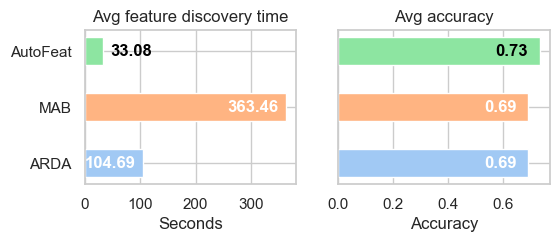

In [25]:
avgd_all = []

# a = dataframe.groupby(['approach', 'algorithm', 'data_label',])[['accuracy']].max().reset_index(level=['algorithm', 'data_label'])
a = dataframe.groupby(['approach', 'algorithm', 
                       'data_label'])[['feature_selection_time', 
                                       'train_time', 'accuracy']].max().reset_index(level=['algorithm', 
                                                                                           'data_label'])



ARDA = a.loc['ARDA']
ARDA = ARDA[~ARDA['data_label'].isin(['superconduct', 'yprop'])]

print(f"ARDA: {ARDA['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'ARDA'
avgd['avg_acc'] = ARDA['accuracy'].mean()
avgd['avg_feat_sel_time'] = ARDA['feature_selection_time'].mean()
avgd['avg_train_time'] = ARDA['train_time'].mean()

avgd_all.append(avgd)

MAB = a.loc['MAB']
MAB = MAB[~MAB['data_label'].isin(['superconduct', 'yprop'])]
print(f"MAB: {MAB['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'MAB'
avgd['avg_acc'] = MAB['accuracy'].mean()
avgd['avg_feat_sel_time'] = MAB['feature_selection_time'].mean()
avgd['avg_train_time'] = MAB['train_time'].mean()
avgd_all.append(avgd)


TFD_BFS = a.loc['AutoFeat']
TFD_BFS = TFD_BFS[~TFD_BFS['data_label'].isin(['superconduct', 'yprop'])]
print(f"TFD: {TFD_BFS['accuracy'].mean()}")

avgd = {}
avgd['approach'] = 'AutoFeat'
avgd['avg_acc'] = TFD_BFS['accuracy'].mean()
avgd['avg_feat_sel_time'] = TFD_BFS['feature_selection_time'].mean()
avgd['avg_train_time'] = TFD_BFS['train_time'].mean()
avgd_all.append(avgd)


avgdf = pd.DataFrame(avgd_all)

display(avgdf)


pal = sns.color_palette("pastel")
sns.set(font_scale=1, style="whitegrid")


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

rects1 = ax1.barh(avgdf['approach'], avgdf['avg_feat_sel_time'], align='center', height=0.5, 
                  color=[pal[0], pal[1], pal[2]], 
                  )

rects2 = ax2.barh(avgdf['approach'], avgdf['avg_acc'], align='center', height=0.5,
                 color=[pal[0], pal[1], pal[2]],)

large_percentiles = [round(p, 2) if p > 50 else '' for p in avgdf['avg_feat_sel_time']]
small_percentiles = [round(p, 2) if p <= 50 else '' for p in avgdf['avg_feat_sel_time']]
ax1.bar_label(rects1, small_percentiles,
              padding=5, color='black', fontweight='bold')
ax1.bar_label(rects1, large_percentiles,
              padding=-42, color='white', fontweight='bold')


large_percentiles = [round(p, 2) if p > 0.7 else '' for p in avgdf['avg_acc']]
small_percentiles = [round(p, 2) if p <= 0.7 else '' for p in avgdf['avg_acc']]
ax2.bar_label(rects2, small_percentiles,
              padding=-32, color='white', fontweight='bold')
ax2.bar_label(rects2, large_percentiles,
              padding=-32, color='black', fontweight='bold')


ax1.set_xlabel('Seconds')
ax2.set_xlabel('Accuracy')

ax1.set_title('Avg feature discovery time')
ax2.set_title('Avg accuracy')

plt.savefig('plots/all/dd_simple_crown-fixed.pdf', dpi=300, bbox_inches="tight")



<Figure size 640x480 with 0 Axes>

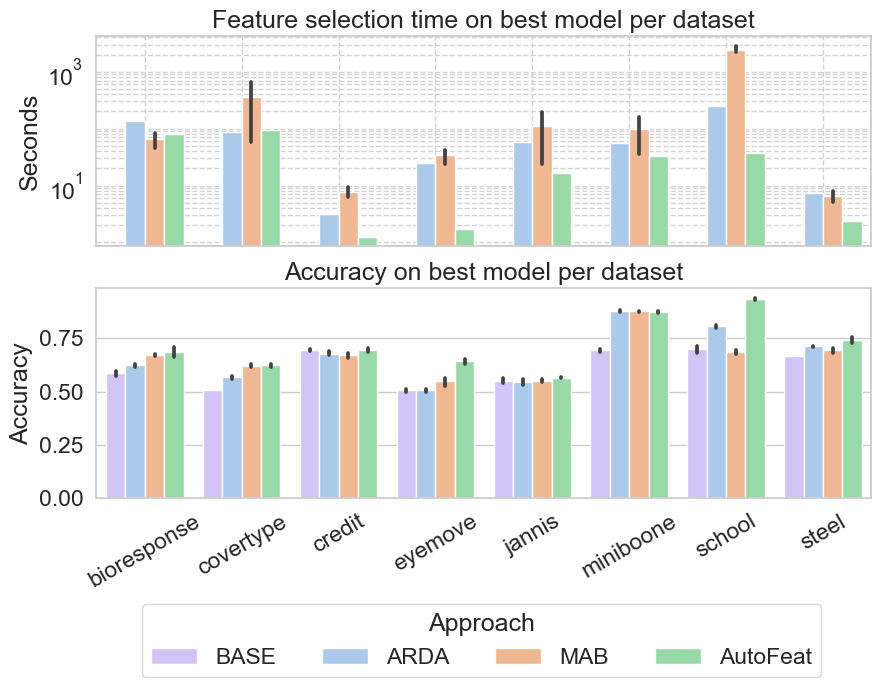

In [26]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', 'feature_selection_time'])[['accuracy']].max().reset_index()
total_time['feature_selection_time'] = total_time['feature_selection_time']

taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]


accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y="feature_selection_time", hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[2]], hue_order=['BASE', 'ARDA', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)


ax1.set_title("Feature selection time on best model per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('log')
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
autofeat_tables = [1, 3, 2, 4, 9, 2, 1, 15]
arda_tables = [23, 12, 2, 3, 4, 15, 16, 3]
total_tables = [40, 12, 5, 6, 12, 15, 17, 15]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center')
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center')



ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Accuracy on best model per dataset")

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
# g._legend.remove()
plt.legend(hh, ll, bbox_to_anchor=(0.95, -0.45), ncol=4, title="Approach")

# plt.savefig('plots/all/dd_simple_acc_feature_selection_time_classification_train_all.pdf', dpi=300, bbox_inches="tight")